<a href="https://colab.research.google.com/github/porxp/DADS6003_ML/blob/main/WDAY_NASDAQ_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# #install Ta-lib
# !wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
# !tar -xzvf ta-lib-0.4.0-src.tar.gz
# %cd ta-lib
# !./configure --prefix=/usr
# !make
# !make install
# !pip install Ta-Lib

# Model 1
Select WORKDAYS in NASDAQ (WDAY)

Workday, Inc., is an American on‑demand (cloud-based) financial management, human capital management, and student information system software vendor.

Parameter = Open, High, Low, Close, S_10, Corr, RSI, Open-Close, Open-Open


In [38]:
### Step 1: Import Libraries

# Data Manipulation
import numpy as np
import pandas as pd
import yfinance as yf

# Technical Indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [39]:
### Step 2: Import Data

st = yf.Ticker('WDAY')
interval = '1h'
start = '2023-01-01'
end = '2023-12-31'
wday_df = st.history(interval=interval,start=start,end=end)
wday_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-01-03 09:30:00-05:00,170.699997,173.869995,168.050003,168.735001,370452,0.0,0.0
2023-01-03 10:30:00-05:00,168.770004,169.339996,167.330002,167.800003,221643,0.0,0.0
2023-01-03 11:30:00-05:00,168.050003,168.050003,167.039993,167.589996,286452,0.0,0.0
2023-01-03 12:30:00-05:00,167.630005,169.330002,167.505005,169.259995,184767,0.0,0.0
2023-01-03 13:30:00-05:00,169.300003,169.875000,168.929993,169.354996,209897,0.0,0.0


In [40]:
### Step 3: Define Predictor/Independent Variables
df = wday_df.iloc[:,:4]

# 10-days moving average
df['S_10'] = df['Close'].rolling(window=10).mean()

#10-days moving correlation
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])

# 10-days moving relative strength index (RSI)
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)

# the difference btw the yesterday close price and the today open price
df['Open-Close'] = df['Open'] - df['Close'].shift(1)

# the difference btw the open price of yesterday and today
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.copy()
display(X)

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,
2023-01-05 13:30:00-05:00,159.919998,161.169998,159.830002,161.000000,165.856500,0.765375,30.831403,0.005005,0.349991
2023-01-05 14:30:00-05:00,160.990005,162.460007,159.929993,160.235001,164.763000,0.759637,29.088013,-0.009995,1.070007
2023-01-05 15:30:00-05:00,160.220001,160.800003,160.029999,160.190002,163.626001,0.733398,28.980909,-0.014999,-0.770004
2023-01-06 09:30:00-05:00,163.199997,164.729996,157.956497,160.160004,162.718501,0.683567,28.902081,3.009995,2.979996
2023-01-06 10:30:00-05:00,160.130005,162.330002,159.899994,161.470001,161.765501,0.536440,37.191372,-0.029999,-3.069992
...,...,...,...,...,...,...,...,...,...
2023-12-29 11:30:00-05:00,274.450012,275.230011,274.290009,274.760010,275.801501,-0.468834,48.954377,0.080017,-1.929993
2023-12-29 12:30:00-05:00,274.799988,276.459991,274.799988,276.130005,275.852502,-0.510085,60.064876,0.039978,0.349976
2023-12-29 13:30:00-05:00,276.109985,276.989990,276.019989,276.470001,275.861002,-0.297517,62.326025,-0.020020,1.309998


In [41]:
### Step 4: Define Target/Dependent Variable

# greater= 1 buy signal, less=-1 sell signal
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

In [42]:
### Step 5: Split The Dataset

# test size = 30%
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [43]:
### Step 6: Instantiate The Logistic Regression in Python
model = LogisticRegression(max_iter=1000)
model = model.fit(X_train,y_train)

In [44]:
### Step 7: Examine The Coefficients
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[-0.020219387522786406]
1,High,[-0.0330032206018424]
2,Low,[0.0030075862833678565]
3,Close,[0.0561871432776708]
4,S_10,[-0.003986364766111823]
5,Corr,[0.04164416745294349]
6,RSI,[-0.0062054393063124]
7,Open-Close,[0.07660483156837747]
8,Open-Open,[-0.05989150882983475]


In [45]:
### Step 8: Calculate Class Probabilities

# Specify the date for prediction
prediction_date = '2025-02-14'
probability = model.predict_proba(X_test)
print(probability)


[[0.42937294 0.57062706]
 [0.45166461 0.54833539]
 [0.43312259 0.56687741]
 ...
 [0.48076962 0.51923038]
 [0.46470976 0.53529024]
 [0.4507493  0.5492507 ]]


In [46]:
### Step 9: Predict Class Labels
predicted = model.predict(X_test)
print(predicted)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1 -1 -1  1  1 -1  1 -1  1  1
 -1 -1  1  1 -1  1 -1  1 -1  1  1 -1 -1  1  1 -1  1 -1  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1  1 -1  1  1  1  1 -1
  1 -1 -1  1  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1  1  1  1  1  1 -1 -1 -1
 -1 -1  1  1  1  1  1  1 -1  1  1  1  1 -1  1 -1 -1  1  1  1  1 -1 -1  1
 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1 -1  1 -1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1

In [47]:
### Step 10: Evaluate The Model

# Confusion Matrix
print(metrics.confusion_matrix(y_test, predicted))

# Classification Report
print(metrics.classification_report(y_test, predicted));


[[ 22 227]
 [ 43 226]]
              precision    recall  f1-score   support

          -1       0.34      0.09      0.14       249
           1       0.50      0.84      0.63       269

    accuracy                           0.48       518
   macro avg       0.42      0.46      0.38       518
weighted avg       0.42      0.48      0.39       518



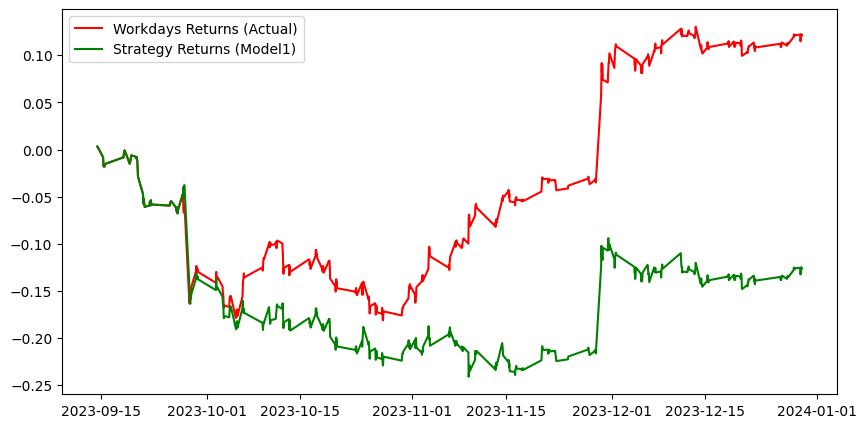

In [48]:
### Step 11: Create Trading Strategy Using The Model

# predict the signal to buy (1) or sell (-1)
df['Predicted_Signal'] = model.predict(X)

# calculate the cumulative BTS returns
df['WDAY_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_WDAY_returns = np.cumsum(df[split:]['WDAY_returns'])

# calculate the cumulative strategy return
df['Strategy_returns'] = df['WDAY_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Strategy_returns'])

# plot the cumulative returns.
plt.figure(figsize=(10,5))
plt.plot(Cumulative_WDAY_returns, color='r', label = 'Workdays Returns (Actual)')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns (Model1)')
plt.legend()
plt.show()

#Model 2

Parameter = Price of Microsoft Corporation (MSFT)  (Open, High, Low, Close)

Does Microsoft impact Workdays stock price on the Nasdaq?

In [49]:
### Step 1 : Import Data

st = yf.Ticker('MSFT')
interval = '1h'
start = '2023-01-01'
end = '2023-12-31'
MSFT_df = st.history(interval=interval,start=start,end=end)
MSFT_df.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-01-03 09:30:00-05:00,243.080002,245.750000,239.340103,239.788101,6337273,0.0,0.0
2023-01-03 10:30:00-05:00,239.800003,239.830002,237.500000,238.360001,3058832,0.0,0.0
2023-01-03 11:30:00-05:00,238.369995,238.690002,237.500000,238.150101,2236397,0.0,0.0
2023-01-03 12:30:00-05:00,238.179993,238.990005,237.399994,238.440002,2596124,0.0,0.0
2023-01-03 13:30:00-05:00,238.449997,238.949997,238.050003,238.550003,1635805,0.0,0.0


In [50]:
### Step 2 : merge dataframe df1-df2

df2 = MSFT_df.iloc[:,:4]

merged_df = pd.merge(df.iloc[:,:4], df2,on='Datetime', how='inner')

merged_df.rename(columns={'Open_x': 'Open_WDAY'}, inplace=True)
merged_df.rename(columns={'Open_y': 'Open_MSFT'}, inplace=True)
merged_df.rename(columns={'High_x': 'High_WDAY'}, inplace=True)
merged_df.rename(columns={'High_y': 'High_MSFT'}, inplace=True)
merged_df.rename(columns={'Low_x': 'Low_WDAY'}, inplace=True)
merged_df.rename(columns={'Low_y': 'Low_MSFT'}, inplace=True)
merged_df.rename(columns={'Close_x': 'Close_WDAY'}, inplace=True)
merged_df.rename(columns={'Close_y': 'Close_MSFT'}, inplace=True)

merged_df.head()

,Open_WDAY,High_WDAY,Low_WDAY,Close_WDAY,Open_MSFT,High_MSFT,Low_MSFT,Close_MSFT
Datetime,,,,,,,,
2023-01-05 13:30:00-05:00,159.919998,161.169998,159.830002,161.000000,222.779999,223.839996,222.779999,223.252899
2023-01-05 14:30:00-05:00,160.990005,162.460007,159.929993,160.235001,223.250000,224.679993,222.850006,222.875000
2023-01-05 15:30:00-05:00,160.220001,160.800003,160.029999,160.190002,222.880005,222.910004,221.839996,222.270004
2023-01-06 09:30:00-05:00,163.199997,164.729996,157.956497,160.160004,223.000000,223.649994,219.350006,221.395004
2023-01-06 10:30:00-05:00,160.130005,162.330002,159.899994,161.470001,221.410004,223.350006,221.300003,222.259995


In [51]:
### Step 3: Define Target/Dependent Variable

X2 = merged_df.copy()
y2 = np.where(merged_df['Close_WDAY'].shift(-1) > merged_df['Close_WDAY'],1,-1)
y2

array([-1, -1, -1, ..., -1, -1, -1])

In [52]:
### Step 4: Split The Dataset

split2 = int(0.7*len(merged_df))
X2_train, X2_test, y2_train, y2_test = X2[:split2], X2[split2:], y2[:split2], y2[split2:]

In [53]:
### Step 5: Logistic Regression

model2 = LogisticRegression(max_iter=1000)
model2 = model2.fit(X2_train,y2_train)

In [54]:
### Step 6: Examine The Coefficients

pd.DataFrame(zip(X2.columns, np.transpose(model2.coef_)))

,0,1
0,Open_WDAY,[-0.03109997648460685]
1,High_WDAY,[0.011742443167898723]
2,Low_WDAY,[-0.02605351898235563]
3,Close_WDAY,[0.04098547694387363]
4,Open_MSFT,[0.07948616719569337]
5,High_MSFT,[-0.08749852464517127]
6,Low_MSFT,[-0.006511871972663981]
7,Close_MSFT,[0.01797604708760507]


In [55]:
### Step 7: Calculate Class Probabilities

# Specify the date for prediction
predictionb_date = '2025-02-14'
probabilityb = model2.predict_proba(X2_test)
probabilityb

array([[0.47685986, 0.52314014],
       [0.49240331, 0.50759669],
       [0.50713533, 0.49286467],
       ...,
       [0.50101956, 0.49898044],
       [0.49757544, 0.50242456],
       [0.49313639, 0.50686361]])

In [56]:
### Step 8: Predict Class Labels

predicted2 = model2.predict(X2_test)
predicted2

array([ 1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1

In [57]:
### Step 9: Evaluate The Model

# Confusion Matrix
print(metrics.confusion_matrix(y2_test, predicted2))

# Classification Report
print(metrics.classification_report(y2_test, predicted2));


[[ 41 208]
 [ 40 229]]
              precision    recall  f1-score   support

          -1       0.51      0.16      0.25       249
           1       0.52      0.85      0.65       269

    accuracy                           0.52       518
   macro avg       0.52      0.51      0.45       518
weighted avg       0.52      0.52      0.46       518



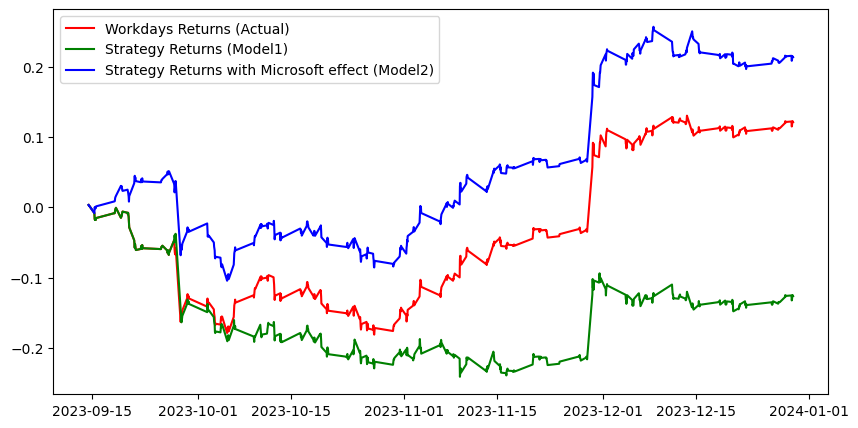

In [58]:
### Step 10: Create Trading Strategy Using The Model

# plot the cumulative returns.
plt.figure(figsize=(10,5))

# Red line: Acual WORKDAYS return
plt.plot(Cumulative_WDAY_returns, color='r', label = 'Workdays Returns (Actual)')

# Green line: Strategy Returns (Model1)
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns (Model1)')

# Blue line: Strategy Returns with Microsoft effect (Model2)
merged_df['Predicted_Signal2'] = model2.predict(X2)
merged_df['WDAY_MSFT'] = np.log(merged_df['Close_WDAY']/merged_df['Close_WDAY'].shift(1))
Cumulative_WDAY_MSFT_returns = np.cumsum(merged_df[split2:]['WDAY_MSFT'])
merged_df['Strategy2_returns'] = merged_df['WDAY_MSFT']* merged_df['Predicted_Signal2'].shift(1)
Cumulative_Strategy2_returns = np.cumsum(merged_df[split:]['Strategy2_returns'])
plt.plot(Cumulative_Strategy2_returns, color='b', label = 'Strategy Returns with Microsoft effect (Model2)')

plt.legend()
plt.show()